In [111]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [112]:
df = quandl.get("EOD/AAPL", authtoken="oJKDgL8MavzZHCxD_hYT")

In [113]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [115]:
df  = df.loc[:,'Adj_Open':'Adj_Volume']

In [116]:
df

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,
2013-09-03,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...
2017-12-21,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,41.088858,41.250038,40.819183,41.033528,132742144.0


In [117]:
df['HL_PCT'] = (df['Adj_Open']-df['Adj_Low'])/df['Adj_Close']*100

In [118]:
df['PCT_change'] = (df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100

In [119]:
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Open,1.000000,0.999528,0.999416,0.998987,-0.549990,-0.046799,-0.018729
Adj_High,0.999528,1.000000,0.999278,0.999526,-0.544404,-0.056404,0.003561
Adj_Low,0.999416,0.999278,1.000000,0.999558,-0.560073,-0.080075,0.005597
Adj_Close,0.998987,0.999526,0.999558,1.000000,-0.553474,-0.080320,0.025237
Adj_Volume,-0.549990,-0.544404,-0.560073,-0.553474,1.000000,0.353000,-0.079556
HL_PCT,-0.046799,-0.056404,-0.080075,-0.080320,0.353000,1.000000,-0.742613
PCT_change,-0.018729,0.003561,0.005597,0.025237,-0.079556,-0.742613,1.000000


In [120]:
df = df[['Adj_Close','PCT_change','HL_PCT','Adj_Volume']]

In [121]:
df.isna().sum()

Adj_Close     0
PCT_change    0
HL_PCT        0
Adj_Volume    0
dtype: int64

In [122]:
df

,Adj_Close,PCT_change,HL_PCT,Adj_Volume
Date,,,,
2013-09-03,15.476472,-0.916650,1.176880,331928800.0
2013-09-04,15.796753,-0.173953,0.657722,345032800.0
2013-09-05,15.688388,-0.995502,1.334626,236367600.0
2013-09-06,15.781833,-0.044138,1.704066,359525600.0
2013-09-09,16.033661,0.231683,0.300294,340687200.0
...,...,...,...,...
2017-12-21,42.101646,0.482287,0.039998,83799584.0
2017-12-22,42.101646,0.188917,0.102851,65397776.0
2017-12-26,41.033528,-0.134660,0.657208,132742144.0


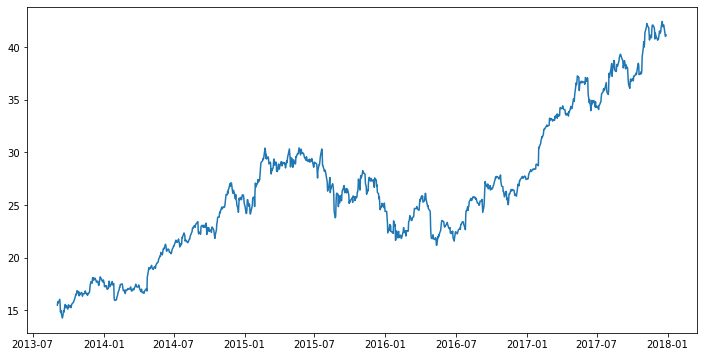

In [123]:
plt.figure(figsize=(12,6))
plt.plot('Adj_Close', data=df)

In [124]:
y = df['Adj_Close']

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [127]:
y_train

Date
2015-01-27    24.853219
2016-03-14    23.870268
2017-10-12    37.393594
2014-08-28    23.183993
2016-02-23    22.047168
                ...    
2014-12-23    25.627462
2015-07-10    28.300168
2014-02-26    16.581851
2017-10-24    37.657267
2017-02-01    30.480553
Name: Adj_Close, Length: 763, dtype: float64

In [128]:
regmod = LinearRegression()

In [129]:
regmod.fit(X_train,y_train)

LinearRegression()

In [130]:
mean_squared_error(y_test,linreg.predict(X_test))

1.0936549940003034e+17